In [17]:
import pandas as pd

import opendatasets as od

from glob import glob

from django.core.validators import URLValidator
from django.core.exceptions import ValidationError

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import numpy as np


In [18]:
def import_data(path):
    '''
    Function to import the dataset from kaggle, it only accepts strings and file paths from kaggle
    It then uses the opendatasets function to download the file into the local folder before then using 
    the get_folder_name function to get the name of the newly created folder, next it uses glob to extract the
    file name and finally the data is imported as a pandas dataframe which is returned to the user

    >>> import_data("www.bbc.com/itv/one/two/three")
    Invalid URL format
    >>> import_data(43)
    Invalid input, file path must be a string
    >>> import_data("https://github.com/microsoft/pyright/blob/main/docs/configuration.md#reportMissingModuleSource")
    You must enter a url to a dataset within kaggle


    '''
    if not isinstance(path, str): # input must be a string
        print("Invalid input, file path must be a string")
    else:
        validator = URLValidator() #  create validator object

        try: # try catch statement to see if file path is valid
            validator(path)

            if "kaggle" not in path: # if the word kaggle isnt in the path then the path isnt to kaggle so is invalid
                print("You must enter a url to a dataset within kaggle")
            else:

                try: # try catch incase there are other issues meaning the dataset cant be downloaded
                    get_data = od.download(path) # downloads the data from kaggle

                    folder = get_folder_name(path) # get the folder name
                    filename = glob("{}/*.csv".format(folder))[0] # get the file name
                    data = pd.read_csv(filename, index_col=0) # download the data as a pandas dataframe

                    return data
                except:
                    print("Unable to download dataset")

                

        except ValidationError:
            print("Invalid URL format")

        



    


def get_folder_name(path):
    '''
    Function which takes a string and finds all the text after the last backslash, this is the name of the folder created
    when data is imported from kaggle
    >>> get_folder_name("https://www.kaggle.com/datasets/camnugent/california-housing-prices")
    'california-housing-prices'
    >>> get_folder_name("https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog")
    'usedcarscatalog'
    '''
    folder = path.split("/")[-1] # folder name will be after the last forwardslash
    return folder


In [19]:
import doctest

doctest.testmod(verbose=True)

Trying:
    get_folder_name("https://www.kaggle.com/datasets/camnugent/california-housing-prices")
Expecting:
    'california-housing-prices'
ok
Trying:
    get_folder_name("https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog")
Expecting:
    'usedcarscatalog'
ok
Trying:
    import_data("www.bbc.com/itv/one/two/three")
Expecting:
    Invalid URL format
ok
Trying:
    import_data(43)
Expecting:
    Invalid input, file path must be a string
ok
Trying:
    import_data("https://github.com/microsoft/pyright/blob/main/docs/configuration.md#reportMissingModuleSource")
Expecting:
    You must enter a url to a dataset within kaggle
ok
4 items had no tests:
    __main__
    __main__.clean_col_names
    __main__.create_boxenplots
    __main__.create_scatter_plots
2 items passed all tests:
   2 tests in __main__.get_folder_name
   3 tests in __main__.import_data
5 tests in 6 items.
5 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=5)

In [20]:

x = import_data("https://www.kaggle.com/datasets/thedevastator/uk-mortgage-rates-thousands-of-mortgage-products")
x


Skipping, found downloaded files in ".\uk-mortgage-rates-thousands-of-mortgage-products" (use force=True to force download)


,SKU,BANK_NAME,MTG_PRODUCT_SUBTITLE,MTG_PRODUCT_TYPE_RAW,MTG_PRODUCT_TYPE,MTG_PRODUCT_YEARS,MTG_INITIAL_RATE_PCT,MTG_APR_PCT,MTG_REVERT_RATE,MTG_FEES_TOTAL,MTG_INITIAL_RATE_MONTHS,SCAN_DATE,TID
index,,,,,,,,,,,,,
0,3739342,Foundation Home Loans,Remortgage,5 year fixed,fixed,25,7.69,7.7,7.24,630.0,60,2022-10-16 06:42:26,483184
1,3738960,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.34,8.0,7.35,2347.0,24,2022-10-16 06:42:26,483185
2,3739028,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.49,7.9,7.35,108.0,24,2022-10-16 06:42:26,483186
3,3738961,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,8.94,8.6,7.35,2347.0,60,2022-10-16 06:42:26,483187
4,3739020,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,9.09,8.6,7.55,108.0,60,2022-10-16 06:42:26,483188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,3738961,Kensington Mortgages,Buy to let,5 year fixed,fixed,25,8.94,8.6,7.35,2407.0,60,2022-10-16 06:42:26,490975
7792,3739016,Kensington Mortgages,Buy to let,5 year fixed,fixed,25,8.99,8.1,6.75,108.0,60,2022-10-16 06:42:26,490976
7793,3739021,Kensington Mortgages,Buy to let,5 year fixed,fixed,25,9.09,8.6,7.55,108.0,60,2022-10-16 06:42:26,490977


In [21]:
x.describe().T


,count,mean,std,min,25%,50%,75%,max
SKU,7796.0,3.645263e+07,1.776887e+08,2504796.00,3739206.000,3745039.00,3747776.00,1.000723e+09
MTG_PRODUCT_YEARS,7796.0,2.500000e+01,0.000000e+00,25.00,25.000,25.00,25.00,2.500000e+01
MTG_INITIAL_RATE_PCT,7796.0,6.113052e+00,1.440398e+00,2.59,5.615,6.10,6.62,9.940000e+00
MTG_APR_PCT,7796.0,6.355272e+00,9.617704e-01,3.50,5.700,6.10,6.90,9.700000e+00
MTG_REVERT_RATE,7468.0,6.014436e+00,8.826946e-01,3.59,5.390,5.99,6.74,7.550000e+00
MTG_FEES_TOTAL,7796.0,1.115779e+03,9.968911e+02,0.00,210.000,1049.00,1495.00,8.388000e+03
MTG_INITIAL_RATE_MONTHS,7796.0,5.434518e+01,5.525367e+01,12.00,25.000,36.00,62.00,3.000000e+02
TID,7796.0,4.870815e+05,2.250656e+03,483184.00,485132.750,487081.50,489030.25,4.909790e+05


In [22]:
def clean_col_names(df,new_col_names):
    '''
    Function which takes a dataframe, and a list of new column names to assign to it and changes all the column names. The dataframe must be a valid dataframe and columns must be a list
    where each item in the list is a string and the length of the list must be the same as the number of columns
    '''
    if not isinstance(df, pd.DataFrame): # must be a valid dataframe
        print("Invalid dataframe input, this is not a pandas dataframe")
    elif not isinstance(new_col_names, list): # must be a list
        print("You must enter a list object containing the names of the new columns")
    elif all(map(lambda x: isinstance(x, str), new_col_names)) is False: # each item in the list must be a string
        print("All items in the list of new names must be strings")
    elif len(df.columns) != len(new_col_names): # the number of items in the list must be the same as the number of dataframe columns
            print("The length of the list of new names must equal the number of columns in the data frame, which is {}".format(len(df.columns)))
    else: # all conditions met
        joined_dict = dict(zip(x.columns, new_col_names)) # create dictionary to map new names to old
        renamed_df = df.rename(columns = joined_dict) # rename columns
        return(renamed_df)


In [23]:
x.columns

Index(['SKU', 'BANK_NAME', 'MTG_PRODUCT_SUBTITLE', 'MTG_PRODUCT_TYPE_RAW',
       'MTG_PRODUCT_TYPE', 'MTG_PRODUCT_YEARS', 'MTG_INITIAL_RATE_PCT',
       'MTG_APR_PCT', 'MTG_REVERT_RATE', 'MTG_FEES_TOTAL',
       'MTG_INITIAL_RATE_MONTHS', 'SCAN_DATE', 'TID'],
      dtype='object')

In [24]:
new_names = ["Products SKU", "Bank", "Mortgage product subtitle", 
"Product type subtitle", "Product type", "Length of Mortgage", 
"Initial Rate","APR percentage", "Revert Rate", "Total Fees", "Initial Rate months", "Date scanned","ID KEY"]

In [25]:
dd = clean_col_names(x,new_names)


In [26]:
dd

,Products SKU,Bank,Mortgage product subtitle,Product type subtitle,Product type,Length of Mortgage,Initial Rate,APR percentage,Revert Rate,Total Fees,Initial Rate months,Date scanned,ID KEY
index,,,,,,,,,,,,,
0,3739342,Foundation Home Loans,Remortgage,5 year fixed,fixed,25,7.69,7.7,7.24,630.0,60,2022-10-16 06:42:26,483184
1,3738960,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.34,8.0,7.35,2347.0,24,2022-10-16 06:42:26,483185
2,3739028,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.49,7.9,7.35,108.0,24,2022-10-16 06:42:26,483186
3,3738961,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,8.94,8.6,7.35,2347.0,60,2022-10-16 06:42:26,483187
4,3739020,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,9.09,8.6,7.55,108.0,60,2022-10-16 06:42:26,483188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,3738961,Kensington Mortgages,Buy to let,5 year fixed,fixed,25,8.94,8.6,7.35,2407.0,60,2022-10-16 06:42:26,490975
7792,3739016,Kensington Mortgages,Buy to let,5 year fixed,fixed,25,8.99,8.1,6.75,108.0,60,2022-10-16 06:42:26,490976
7793,3739021,Kensington Mortgages,Buy to let,5 year fixed,fixed,25,9.09,8.6,7.55,108.0,60,2022-10-16 06:42:26,490977


In [27]:
def create_boxenplots(data, col_names):

    '''
    Function to create boxenplots based on provided columns and dataframe, the dataframe must be a valid dataframe and columns must be a list
    where each item in the list is a string and each string is a valid name of a column in the dataframe, in addition the data type of each column
    must be int or float

    If all conditions are met then a boxenplot with a stripplot to add details is created for each column and added as a subplot to a main plot
    '''

    if not isinstance(data, pd.DataFrame): # must be a valid dataframe
        print("Invalid dataframe input, this is not a pandas dataframe")
    elif not isinstance(col_names, list): # must be a list
        print("You must enter a list object containing the names of columns you want to create boxenplots for")
    elif all(map(lambda x: isinstance(x, str), col_names)) is False: #  all items in the list must be strings
        print("All items in the list of column names must be strings")
    elif all(map(lambda x: x in data.columns, col_names)) is False: # all the strings in the list must be column names of the dataframe
        print("Invalid input must select valid column names")
    elif all(map(lambda x: data.dtypes[x] == np.int64 or data.dtypes[x] == np.float64 , col_names)) is False: # the data type of each column must be int or float
        print("Invalid input the data type of all columns must be numeric (int or float)")
    else: # all conditions passed so create the chart
        plt.rcParams["figure.figsize"] = (20,10) # size of figure

        fig, axes = plt.subplots(ncols=len(col_names)) # create plot and define number of subplots

        for col, ax in zip(col_names, axes): # for each column zip with an axes (subplot) and then loop over to generate the subplot
            sns.axes_style("ticks")
            sns.boxenplot(data = data[col], ax = ax) # create boxenplot
            sns.stripplot(data = data[col], ax = ax, color="red",size=2) # create stripplot
            ax.set_title(col) # add a title
            ax.tick_params(bottom = False, labelbottom =False) #  remove x axis ticks

        plt.show()
        

In [28]:
def create_count_plots(data,col_names):
    '''
    Funtion to create the countplots based on provided columns and a dataframe, the dataframe must be a valid dataframe and columns must be a list
    where each item in the list is a string and each string is a valid name of a column in the dataframe, in addition the data type of each column
    must be string

    If all conditons are met then a countplot is created for each column and added as a subplot to a main plot
    '''
    if not isinstance(data, pd.DataFrame): # must be a valid dataframe
        print("Invalid dataframe input, this is not a pandas dataframe")
    elif not isinstance(col_names, list): # must be a list
        print("You must enter a list object containing the names of columns you want to create count plots for")
    elif all(map(lambda x: isinstance(x, str), col_names)) is False: #  all items in the list must be strings
        print("All items in the list of column names must be strings")
    elif all(map(lambda x: x in data.columns, col_names)) is False: # all the strings in the list must be column names of the dataframe
        print("Invalid input must select valid column names")
    elif all(map(lambda x: data.dtypes[x] == object, col_names)) is False: # the data type of each column must be string (object)
        print("Invalid input the data type of all columns must be string")
    else: # all conditions passed so create the chart
        plt.rcParams["figure.figsize"] = (10,40) # size of figure
        fig, axes = plt.subplots(nrows=len(col_names))

        for col, ax in zip(col_names, axes): # for each column zip with an axes (subplot) and then loop over to generate the subplot
                    sns.axes_style("ticks")
                    sns.countplot(y = col, data = data, color="green", order = data[col].value_counts().index, ax = ax) # create count plot sorted by count
                    ax.set_title("Count plot: {}".format(col)) # add a title
                    ax.set(xlabel=None) # remove x label
                    ax.set(ylabel=None) #  remove y label

        plt.show()
    

In [29]:
data = dd
col_names = ["Bank", "Mortgage product subtitle", "Product type subtitle", "Product type"]
date = "Date scanned"
value = "Total Fees"
hue_value = "Bank"


data["Date"] = pd.to_datetime(data[date])

In [32]:
def create_scatter_plots(data,value_1, value_2, hue_value):
    '''
    Funtion to create the scatter plots based on provided columns and a dataframe, here columns are provided as three seprerate varaibles, 
    the dataframe must be a valid dataframe and columns must be a string, where each is a valid name of a column in the dataframe, in addition the data type of the first two columns (value_1 and value_2)
    must be int or float while the value of the third must be a string

    If all conditons are met then a scatterplot is created for the given columns
    '''
    if not isinstance(data, pd.DataFrame): # must be a valid dataframe
        print("Invalid dataframe input, this is not a pandas dataframe")
    elif all(map(lambda x: isinstance(x, str), [value_1, value_2, hue_value])) is False: #  all column names must be strings
        print("All entered column names must be strings")
    elif all(map(lambda x: x in data.columns, [value_1, value_2, hue_value])) is False: # all the strings entered as column names must be column names of the dataframe
        print("Invalid input must enter valid column names")
    elif (all(map(lambda x: data.dtypes[x] == np.int64 or data.dtypes[x] == np.float64 , [value_1, value_2])) is False) or (data.dtypes[hue_value] != object): # the data type of value_1 and value_2 must be int or float and hue must be string
        print("Invalid input the data types of the two values must be int or float while the hue value must be a string")
    else: # all conditions passed so create the chart
        plt.rcParams["figure.figsize"] = (20,10) # size of figure
        sns.axes_style("ticks")
        chart = sns.scatterplot(data = data, x=value_1, y = value_2, hue=hue_value, s=100, marker = "D")
        chart.set_title("12")
        plt.show()

    

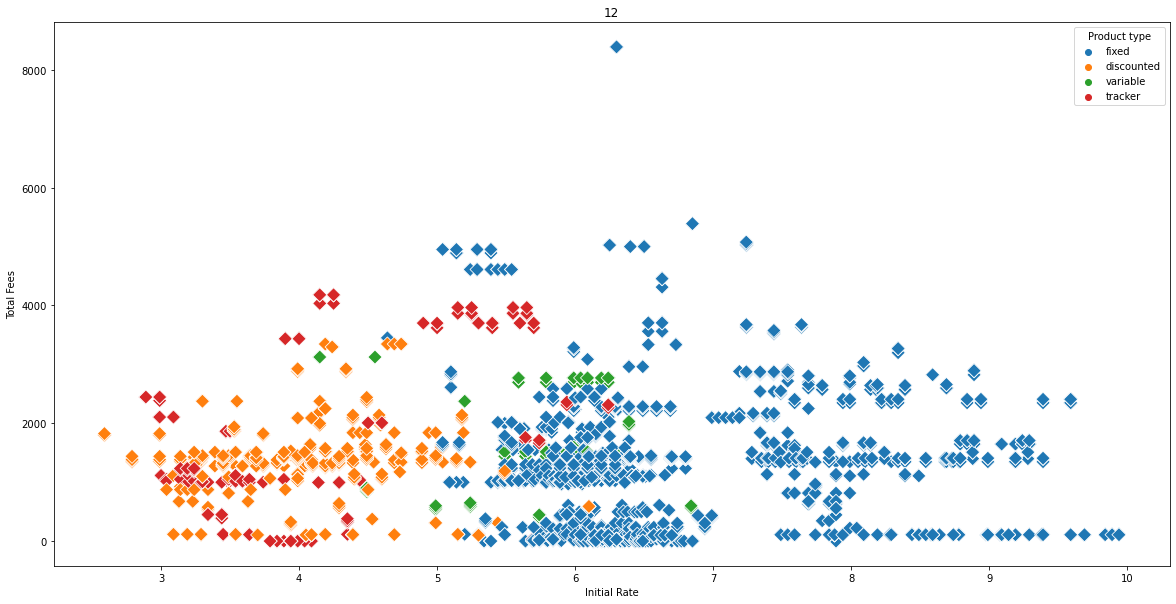

In [33]:
create_scatter_plots(dd,"Initial Rate", "Total Fees","Product type")                             